# Machine Learning Challenge: Predict Titanic Survivors
More information on the [Kaggle site](https://www.kaggle.com/c/titanic/data)

In [71]:
#!pip install -r requirements.txt

In [72]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [73]:
import pandas as pd

In [ ]:
# get titanic & test csv files as a DataFrame
training = pd.read_csv("../data/train.csv")

In [75]:
training.head() # print first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
training.head() # print first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
training.describe() # some interesting statistics for features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
training.keys() # Show features names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Variable Description
- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

In [79]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


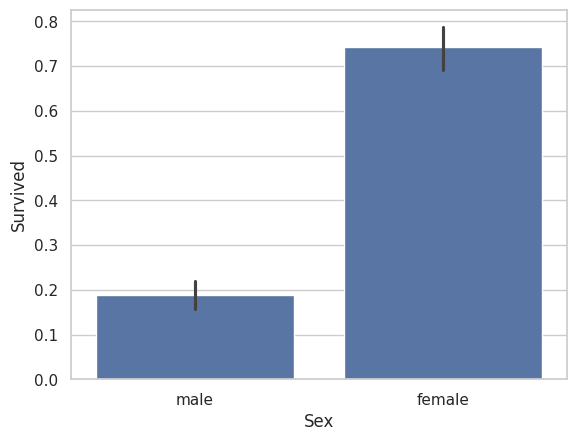

In [ ]:
# Survived rate by sex
sns.barplot(x="Sex", y="Survived", data=training)

<Axes: xlabel='Pclass', ylabel='Survived'>

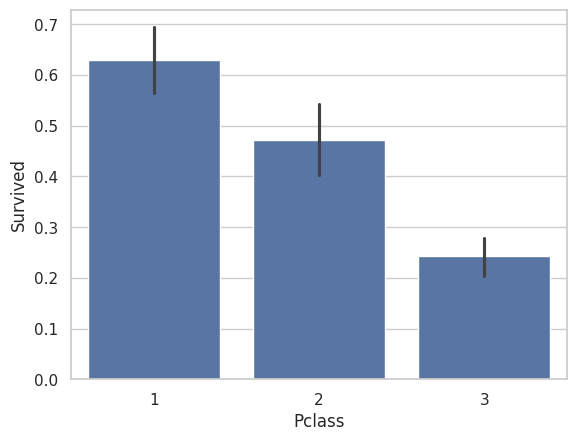

In [81]:
# Survived rate by Pclass
sns.barplot(x="Pclass", y="Survived", data=training)

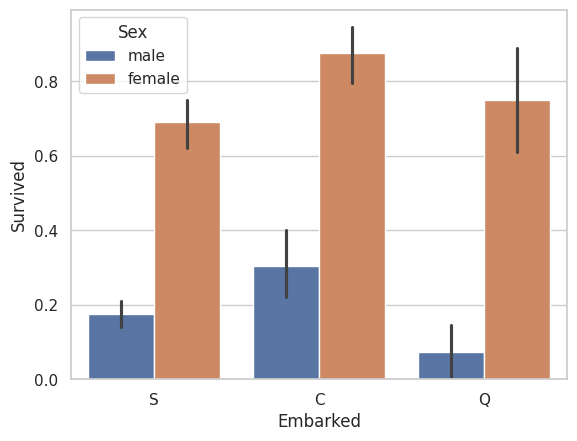

In [82]:
# Survived rate by Embarked
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=training);

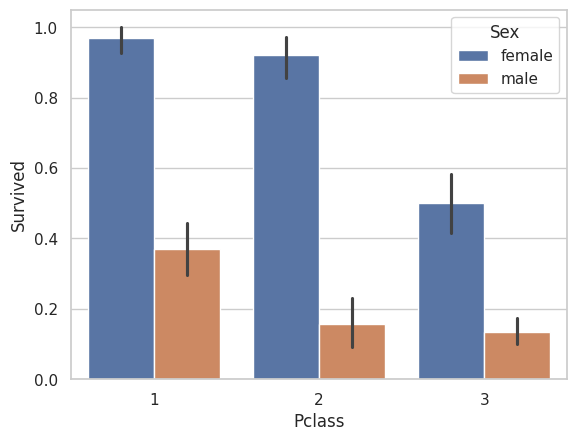

In [83]:
# Survived rate by Pclas and Sex
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training);

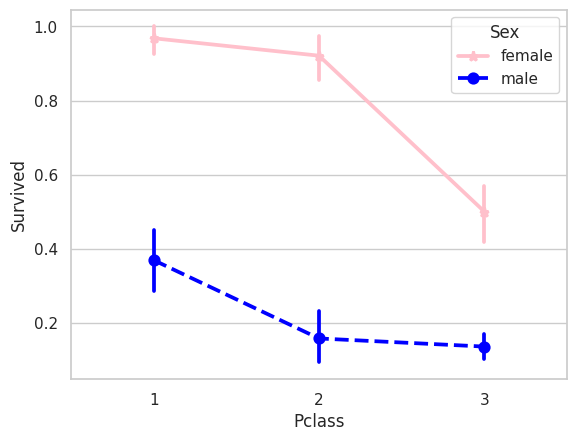

In [84]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=training,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

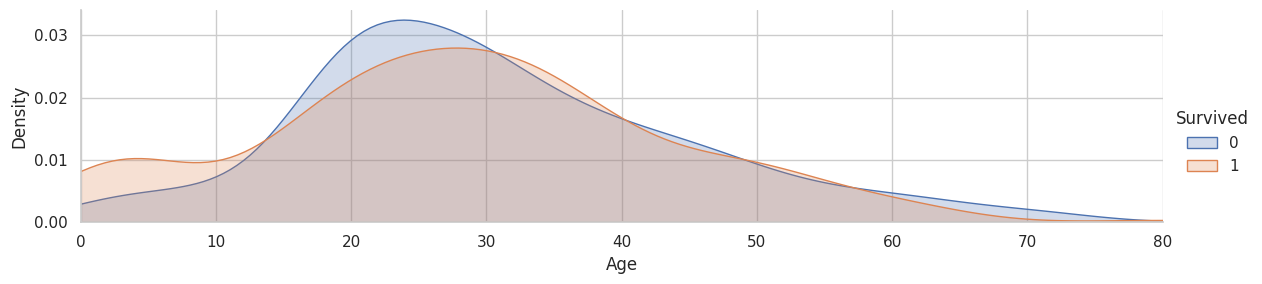

In [85]:
# peaks for survived/not survived passengers by their age

facet = sns.FacetGrid(training, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, training['Age'].max()))
facet.add_legend()

In [86]:
training = training.drop(['Name','Ticket', 'Cabin'], axis=1)

In [87]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [88]:
# Filling missing age values with median
training.Age = training.Age.fillna(training.Age.median())

In [89]:
# Age is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [90]:
Counter(training.Embarked.values)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [91]:
training.Embarked = training.Embarked.fillna('S')

In [92]:
# Embarked is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [93]:
Counter(training.Pclass.values)

Counter({np.int64(3): 491, np.int64(1): 216, np.int64(2): 184})

In [94]:
embark_dummies_titanic  = pd.get_dummies(training['Embarked'])
sex_dummies_titanic  = pd.get_dummies(training['Sex'])
pclass_dummies_titanic  = pd.get_dummies(training['Pclass'], prefix="Class")

In [95]:
embark_dummies_titanic.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [96]:
sex_dummies_titanic.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [97]:
pclass_dummies_titanic.head()

,Class_1,Class_2,Class_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [98]:
training = training.drop(['Embarked', 'Sex', 'Pclass'], axis=1)
titanic = training.join([embark_dummies_titanic, sex_dummies_titanic, pclass_dummies_titanic])
titanic.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3
0,1,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True,True,False,True,False,False
4,5,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_all = titanic.drop('Survived', axis=1)
y_all = titanic.Survived

In [101]:
X_all.to_csv('test.csv')
X_all.set_index('PassengerId', inplace=True)

In [102]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23,stratify=y_all)
#X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)



In [103]:
X_train.shape

(712, 12)

In [104]:
X_test.shape

(179, 12)

In [105]:
y_train.shape

(712,)

In [106]:
y_test.shape

(179,)

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [108]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train, y_train)
pred_linsvc = linsvc_clf.predict(X_test)
acc_linsvc = accuracy_score(y_test, pred_linsvc)

print(acc_linsvc)

0.7821229050279329


In [109]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.8212290502793296


In [132]:
X_train

,Age,SibSp,Parch,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3
PassengerId,,,,,,,,,,,,
542,9.0,4,2,31.2750,False,False,True,True,False,False,False,True
307,28.0,0,0,110.8833,True,False,False,True,False,True,False,False
455,28.0,0,0,8.0500,False,False,True,False,True,False,False,True
200,24.0,0,0,13.0000,False,False,True,True,False,False,True,False
398,46.0,0,0,26.0000,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
52,21.0,0,0,7.8000,False,False,True,False,True,False,False,True
591,35.0,0,0,7.1250,False,False,True,False,True,False,False,True
42,27.0,1,0,21.0000,False,False,True,True,False,False,True,False


Rose DeWiit Bukater
- Pclass: 1st Class
- Sex: Female
- Age: 17
- SibSp: 0
- Parch: 1
- Fare: 53.1000
- Embarked: 'S'

,Age,SibSp,Parch,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3
PassengerId,,,,,,,,,,,,
542,9.0,4,2,31.2750,False,False,True,True,False,False,False,True
307,28.0,0,0,110.8833,True,False,False,True,False,True,False,False
455,28.0,0,0,8.0500,False,False,True,False,True,False,False,True
200,24.0,0,0,13.0000,False,False,True,True,False,False,True,False
398,46.0,0,0,26.0000,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
52,21.0,0,0,7.8000,False,False,True,False,True,False,False,True
591,35.0,0,0,7.1250,False,False,True,False,True,False,False,True
42,27.0,1,0,21.0000,False,False,True,True,False,False,True,False


In [110]:
Rose_DeWiit_Bukater = [17, 0, 1, 53.1000, 0, 0, 1, 1, 0, 1, 0, 0 ]

In [111]:
len(Rose_DeWiit_Bukater)

12

Jack Dawson
- Pclass: 3rd Class
- Sex: Male
- Age: 23
- SibSp: 0
- Parch: 0
- Fare: 0
- Embarked: 'S'

In [136]:
Jack_Dawson = [23, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1 ]

In [137]:
linsvc_clf.predict([Rose_DeWiit_Bukater])

array([1])

In [138]:
linsvc_clf.predict([Jack_Dawson])

array([0])

In [115]:
rf_clf.predict([Rose_DeWiit_Bukater])

array([1])

In [116]:
rf_clf.predict([Jack_Dawson])

array([1])

In [117]:
model_performance = pd.DataFrame({
    "Model": ["Linear SVC", "Random Forest"],
    "Accuracy": [acc_linsvc, acc_rf]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,Random Forest,0.821229
0,Linear SVC,0.782123


In [118]:
import pickle

In [ ]:
pickle.dump(linsvc_clf, open('../models/linsvc_clf.pkl', 'wb'))
pickle.dump(rf_clf, open('../models/rf_clf.pkl', 'wb'))

In [ ]:
linsvc = pickle.load(open( "../models/linsvc_clf.pkl", "rb" ))
rf = pickle.load(open( "../models/rf_clf.pkl", "rb" ))

In [121]:
linsvc.predict([Rose_DeWiit_Bukater, Jack_Dawson])

array([1, 0])

In [122]:
rf.predict([Rose_DeWiit_Bukater, Jack_Dawson])

array([1, 1])

In [123]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 1],
    'min_child_weight': [1, 5]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid = GridSearchCV(xgb_clf, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)
pred_xgb = grid.best_estimator_.predict(X_test)

Best params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1}
Best score: 0.8300403821530582


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Safe param grid (compliant combinations only)
params = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga'], 'l1_ratio': [0.0, 0.5, 1.0]},
    {'penalty': ['none'], 'solver': ['saga']}
]

logreg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(logreg, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

pred_logreg = grid.best_estimator_.predict(X_test)



Best params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.8033487639121443


In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Calculate metrics for each model
metrics = {
    "Model": ["LinearSVC", "RandomForest", "LogisticRegression", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, pred_linsvc),
        accuracy_score(y_test, pred_rf),
        accuracy_score(y_test, pred_logreg),
        accuracy_score(y_test, pred_xgb)
        
    ],
    "Precision": [
        precision_score(y_test, pred_linsvc),
        precision_score(y_test, pred_rf),
        precision_score(y_test, pred_logreg),
        precision_score(y_test, pred_xgb)
        
    ],
    "Recall": [
        recall_score(y_test, pred_linsvc),
        recall_score(y_test, pred_rf),
        recall_score(y_test, pred_logreg),
        recall_score(y_test, pred_xgb)
        
    ],
    "F1-score": [
        f1_score(y_test, pred_linsvc),
        f1_score(y_test, pred_rf),
        f1_score(y_test, pred_logreg),
        f1_score(y_test, pred_xgb)
        
    ]
}

metrics_df = pd.DataFrame(metrics).round(3)
display(metrics_df)


,Model,Accuracy,Precision,Recall,F1-score
0,LinearSVC,0.782,0.768,0.623,0.688
1,RandomForest,0.821,0.814,0.696,0.750
2,LogisticRegression,0.793,0.786,0.638,0.704
3,XGBoost,0.838,0.857,0.696,0.768


## Metrics by sex, age, and passanger class

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_group_metrics(X_test, y_test, y_pred, title_prefix="Model"):
    X_test_reset = X_test.reset_index(drop=True)
    y_test_reset = y_test.reset_index(drop=True)
    y_pred_reset = pd.Series(y_pred).reset_index(drop=True)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Sex
    group_metrics = []
    for group in ['male', 'female']:
        if group in X_test_reset.columns:
            idx = X_test_reset[group] == 1
            if idx.sum() == 0:
                continue
            group_metrics.append({
                "Sex": group,
                "Accuracy": accuracy_score(y_test_reset[idx], y_pred_reset[idx]),
                "Precision": precision_score(y_test_reset[idx], y_pred_reset[idx]),
                "Recall": recall_score(y_test_reset[idx], y_pred_reset[idx]),
                "F1-score": f1_score(y_test_reset[idx], y_pred_reset[idx])
            })
    metrics_by_sex_df = pd.DataFrame(group_metrics).round(3)
    metrics_by_sex_df_melted = metrics_by_sex_df.melt(id_vars="Sex", var_name="Metric", value_name="Score")
    sns.barplot(x="Metric", y="Score", hue="Sex", data=metrics_by_sex_df_melted, ax=axes[0, 0])
    axes[0, 0].set_title(f"{title_prefix} Metrics by Sex")
    axes[0, 0].set_ylabel("Score")
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].legend(title="Sex")

    # Pclass
    group_metrics = []
    for pclass in [1, 2, 3]:
        col = f'Class_{pclass}'
        if col in X_test_reset.columns:
            idx = X_test_reset[col] == 1
            if idx.sum() == 0:
                continue
            group_metrics.append({
                "Pclass": pclass,
                "Accuracy": accuracy_score(y_test_reset[idx], y_pred_reset[idx]),
                "Precision": precision_score(y_test_reset[idx], y_pred_reset[idx]),
                "Recall": recall_score(y_test_reset[idx], y_pred_reset[idx]),
                "F1-score": f1_score(y_test_reset[idx], y_pred_reset[idx])
            })
    metrics_by_pclass_df = pd.DataFrame(group_metrics).round(3)
    metrics_by_pclass_df_melted = metrics_by_pclass_df.melt(id_vars="Pclass", var_name="Metric", value_name="Score")
    sns.barplot(x="Metric", y="Score", hue="Pclass", data=metrics_by_pclass_df_melted, ax=axes[0, 1])
    axes[0, 1].set_title(f"{title_prefix} Metrics by Pclass")
    axes[0, 1].set_ylabel("Score")
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].legend(title="Pclass")

    # AgeGroup (bins)
    age_bins = [0, 12, 18, 50, np.inf]
    age_labels = ['Child', 'Teen', 'Adult (<50)', 'Adult over 50']
    X_test_reset['AgeGroup'] = pd.cut(X_test_reset['Age'], bins=age_bins, labels=age_labels, right=False)
    group_metrics = []
    for group in age_labels:
        idx = X_test_reset['AgeGroup'] == group
        if idx.sum() == 0:
            continue
        group_metrics.append({
            "AgeGroup": group,
            "Accuracy": accuracy_score(y_test_reset[idx], y_pred_reset[idx]),
            "Precision": precision_score(y_test_reset[idx], y_pred_reset[idx]),
            "Recall": recall_score(y_test_reset[idx], y_pred_reset[idx]),
            "F1-score": f1_score(y_test_reset[idx], y_pred_reset[idx])
        })
    metrics_by_age_df = pd.DataFrame(group_metrics).round(3)
    metrics_by_age_df_melted = metrics_by_age_df.melt(id_vars="AgeGroup", var_name="Metric", value_name="Score")
    sns.barplot(x="Metric", y="Score", hue="AgeGroup", data=metrics_by_age_df_melted, ax=axes[1, 0])
    axes[1, 0].set_title(f"{title_prefix} Metrics by Age Group (bins)")
    axes[1, 0].set_ylabel("Score")
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].legend(title="Age Group")

    # AgeGroup (quantiles)
    age_quantiles = X_test_reset['Age'].quantile([0, 0.25, 0.5, 0.75, 1]).values
    age_labels = ['Q1', 'Q2', 'Q3', 'Q4']
    X_test_reset['AgeGroup'] = pd.cut(X_test_reset['Age'], bins=age_quantiles, labels=age_labels, include_lowest=True)
    group_metrics = []
    for group in age_labels:
        idx = X_test_reset['AgeGroup'] == group
        if idx.sum() == 0:
            continue
        group_metrics.append({
            "AgeGroup": group,
            "Accuracy": accuracy_score(y_test_reset[idx], y_pred_reset[idx]),
            "Precision": precision_score(y_test_reset[idx], y_pred_reset[idx]),
            "Recall": recall_score(y_test_reset[idx], y_pred_reset[idx]),
            "F1-score": f1_score(y_test_reset[idx], y_pred_reset[idx])
        })
    metrics_by_age_df = pd.DataFrame(group_metrics).round(3)
    metrics_by_age_df_melted = metrics_by_age_df.melt(id_vars="AgeGroup", var_name="Metric", value_name="Score")
    sns.barplot(x="Metric", y="Score", hue="AgeGroup", data=metrics_by_age_df_melted, ax=axes[1, 1])
    axes[1, 1].set_title(f"{title_prefix} Metrics by Age Group (quantiles)")
    axes[1, 1].set_ylabel("Score")
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].legend(title="Age Group")

    plt.tight_layout()
    plt.show()

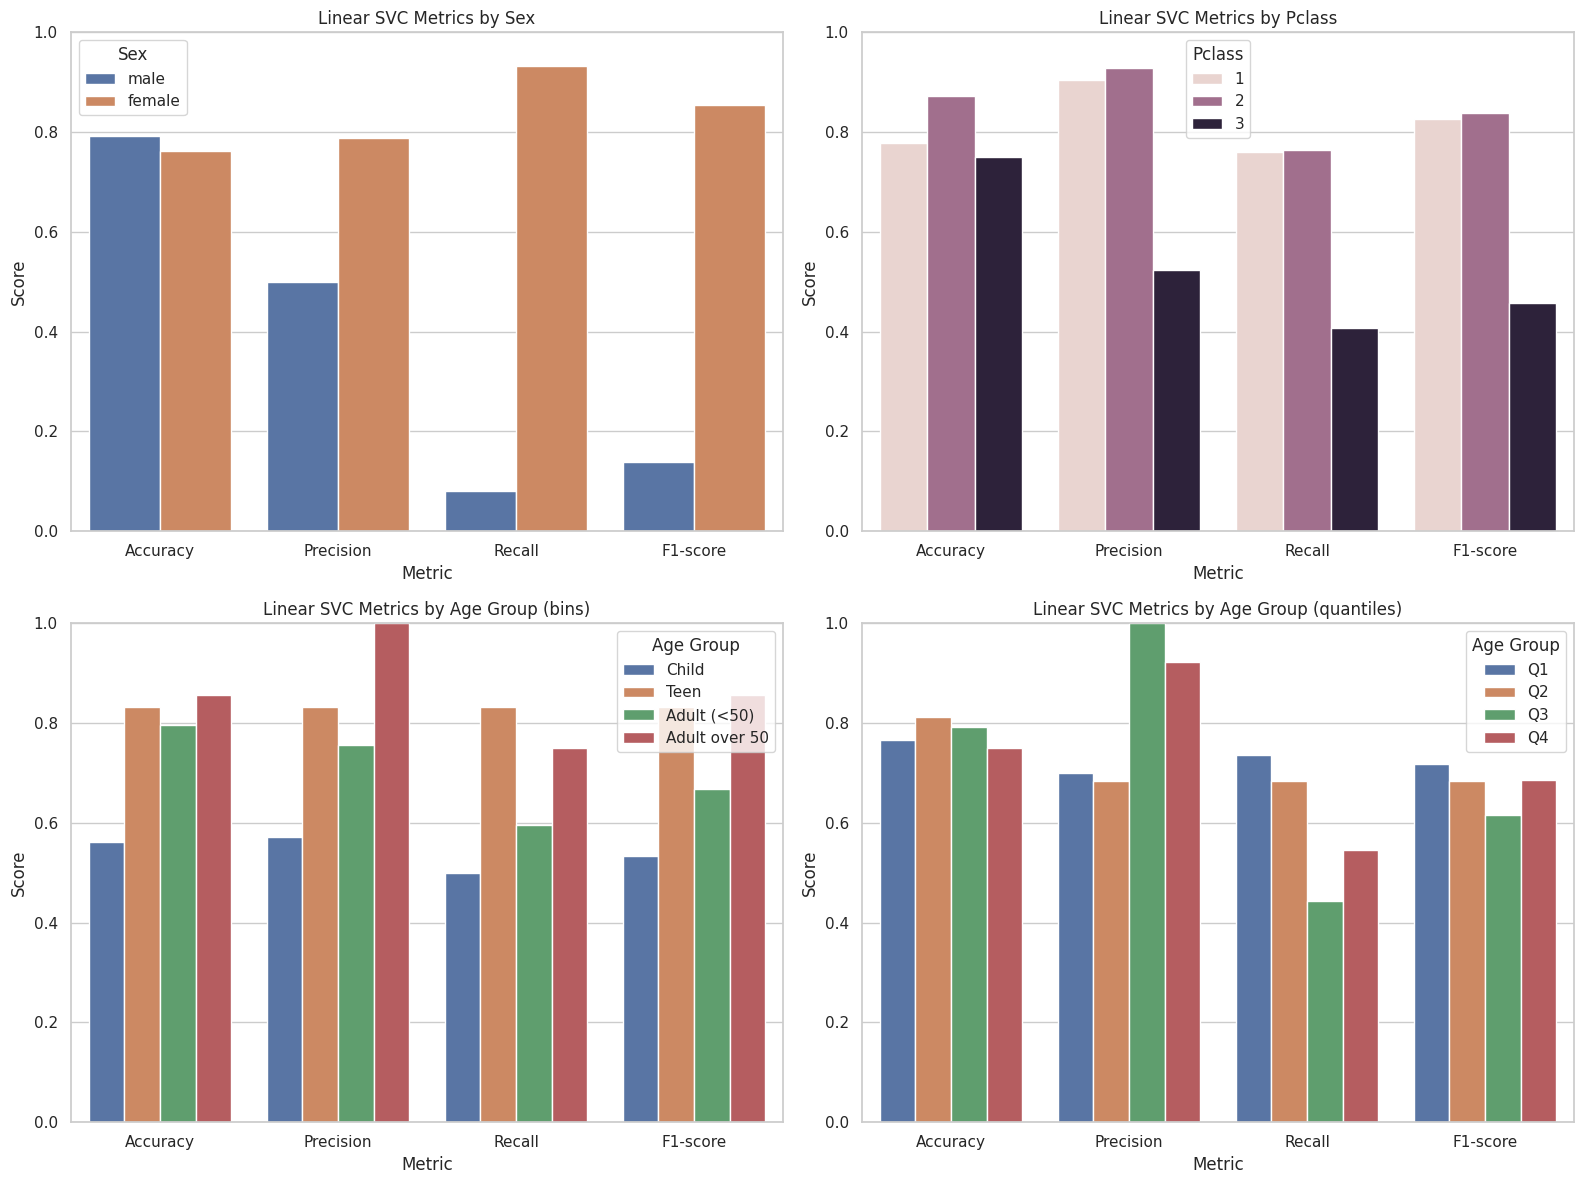

In [127]:
plot_group_metrics(X_test, y_test, pred_linsvc, title_prefix="Linear SVC")

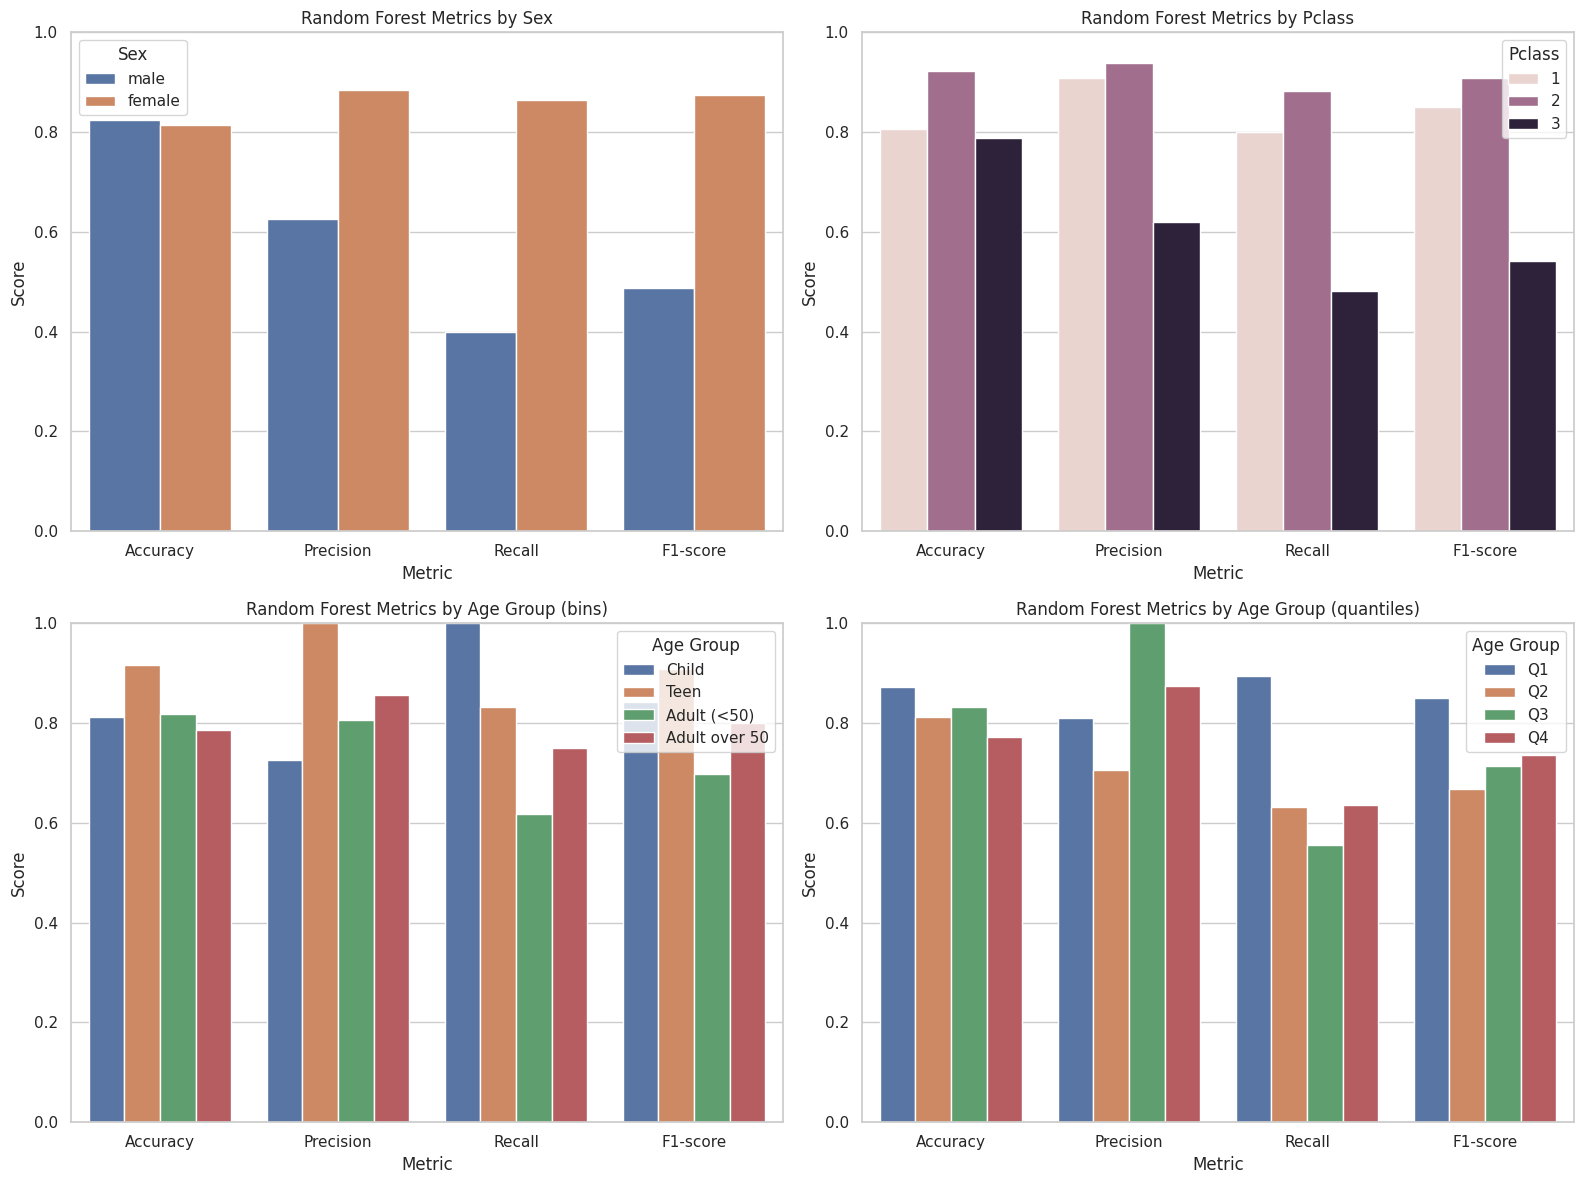

In [128]:
plot_group_metrics(X_test, y_test, pred_rf, title_prefix="Random Forest")

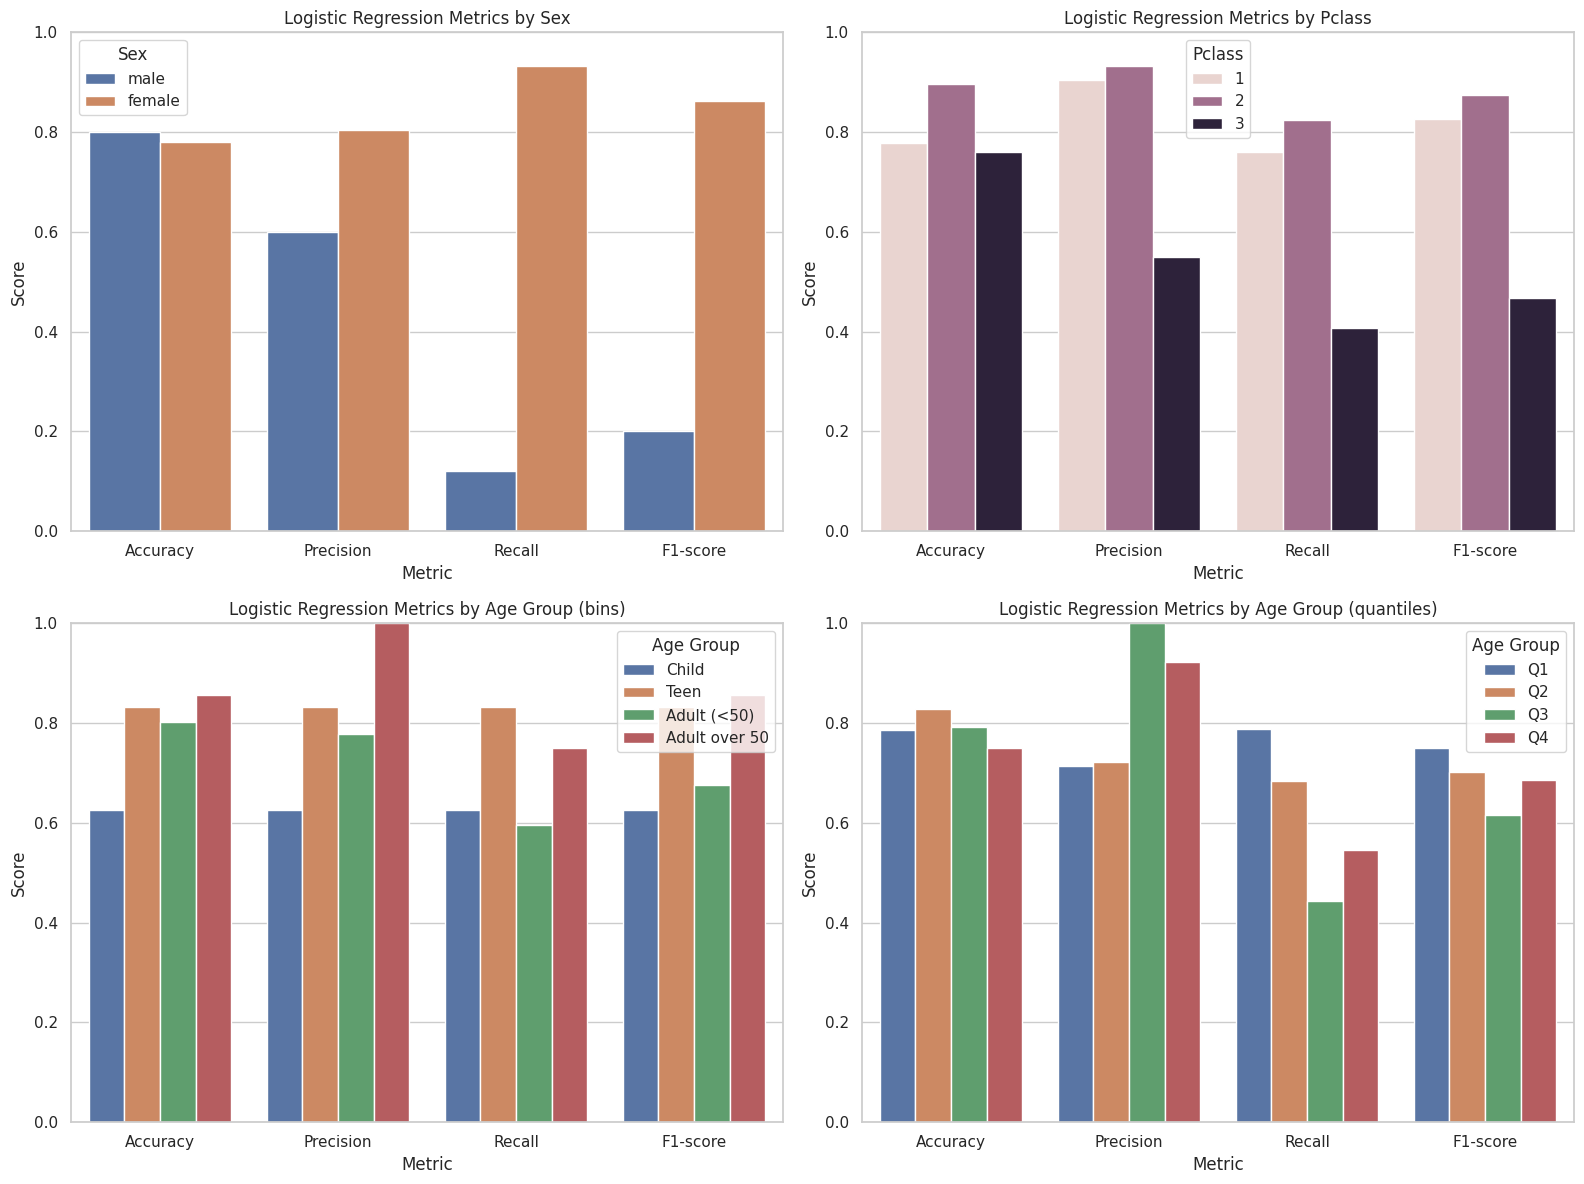

In [130]:
plot_group_metrics(X_test, y_test, pred_logreg, title_prefix="Logistic Regression")

In [ ]:
plot_group_metrics(X_test, y_test, pred_xgb, title_prefix="XGBoost")